# 1.Load the dataset

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#load the dataset
df=pd.read_csv("Weather_Data.csv")

#Display the first few rows
print(df.head())

#Check basic info
print(df.info())

#Summary statistics
print(df.describe())

       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   obje

# 2. Data Checking and Handling

      a. Handling Missing values

In [86]:
#check for missing values
print(df.isnull().sum())

#Fill missing values with mean/median/mode(if applicable)

df.fillna(df.mode(), inplace=True)


Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


# 2

    b.Handling Duplicates

In [87]:
#Check and remove duplicates
print("Duplicates rows:",df.duplicated().sum())
df=df.drop_duplicates

Duplicates rows: 0


# 2
     c.Encoding Categorical Features 

In [117]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the dataset
df = pd.read_csv("Weather_Data.csv")

# Copy the dataset to avoid modifying the original one
df_encoded = df.copy()

# Apply One-Hot Encoding to 'Weather'
df_encoded = pd.get_dummies(df_encoded, columns=['Weather'], drop_first=True)

# Display the first few rows of the encoded dataset
print(df_encoded.head())


       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa  Weather_Cloudy  Weather_Drizzle  \
0            8.0     101.24           False            False   
1            8.0     101.24           False            False   
2            4.0     101.26           False            False   
3            4.0     101.27           False            False   
4            4.8     101.23           False            False   

   Weather_Drizzle,Fog  ...  Weather_Snow,Fog  Weather_Snow,Haze  \
0                False  ...             False              False   
1                False  ...       

In [118]:
print(df.isnull().sum())

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


# Explorary Data Analysis(EDA)
      
     a.Extract Time Features from dataset
     

In [119]:
#Replacing Date/Time with actual column name
df['Date/Time']=pd.to_datetime(df['Date/Time'])

In [120]:

df['hour'] = df['Date/Time'].dt.hour  # Morning, Afternoon, Night
df['day_of_week'] = df['Date/Time'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # 1 = Weekend, 0 = Weekday
df['month'] = df['Date/Time'].dt.month  
df['season'] = df['month'] % 12 // 3 + 1  # Convert month to season (1: Winter, 2: Spring, etc.)

In [154]:
print(df.columns)


Index(['column1'], dtype='object')


In [156]:
print(df.columns.tolist())


['column1']


In [157]:
df.columns = df.columns.str.strip()


In [160]:
numeric_cols = ['Temp_C', 'humidity', 'wind_speed', 'visibility']


In [162]:
print(df.columns.tolist())


['column1']


In [ ]:
# if the file is semicolon-separated:
df = pd.read_csv('Weather_Data.csv', delimiter=';')
print(df.columns.tolist())



['Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather']


In [165]:
df = pd.read_csv('Weather_Data.csv', delimiter='\t')
print(df.columns.tolist())


['Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather']


In [170]:
df = pd.read_csv('Weather_Data.csv', header=None)
# Optionally, assign column names manually:
df.columns = ['date','temp_c','dew point temp in c ','humidity','windspeed','visibility','pressure','weather'] 
print(df.columns.tolist())


['date', 'temp_c', 'dew point temp in c ', 'humidity', 'windspeed', 'visibility', 'pressure', 'weather']


In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your DataFrame (adjust the path as needed)
df = pd.read_csv('Weather_Data.csv')

# Print column names to verify they match your expected names
print(df.columns.tolist())

# Display a summary of the DataFrame
print(df.head())
print(df.describe())


['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather']
       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  
            Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8

In [185]:
# List of numeric columns to handle outliers
numeric_cols = ['temp_c', 'dew point temp in c ', 'humidity', 'windspeed', 'visibility', 'pressure']


Columns after cleaning: ['date', 'temp_c', 'dew point temp in c', 'humidity', 'windspeed', 'visibility', 'pressure', 'weather']
            date  temp_c  dew point temp in c  humidity  windspeed  \
0  1/1/2012 0:00    -1.8                 -3.9        86          4   
1  1/1/2012 1:00    -1.8                 -3.7        87          4   
2  1/1/2012 2:00    -1.8                 -3.4        89          7   
3  1/1/2012 3:00    -1.5                 -3.2        88          6   
4  1/1/2012 4:00    -1.5                 -3.3        88          7   

   visibility  pressure               weather  
0         8.0    101.24                   Fog  
1         8.0    101.24                   Fog  
2         4.0    101.26  Freezing Drizzle,Fog  
3         4.0    101.27  Freezing Drizzle,Fog  
4         4.8    101.23                   Fog  


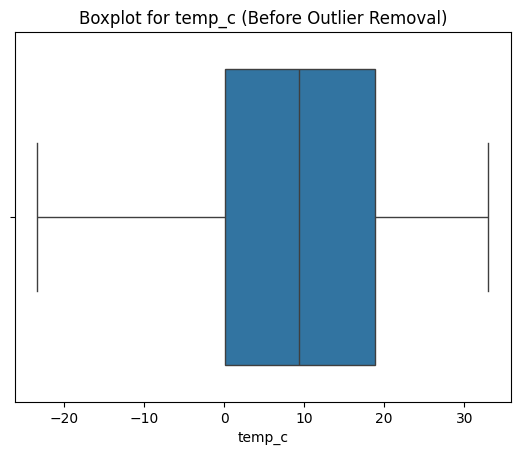

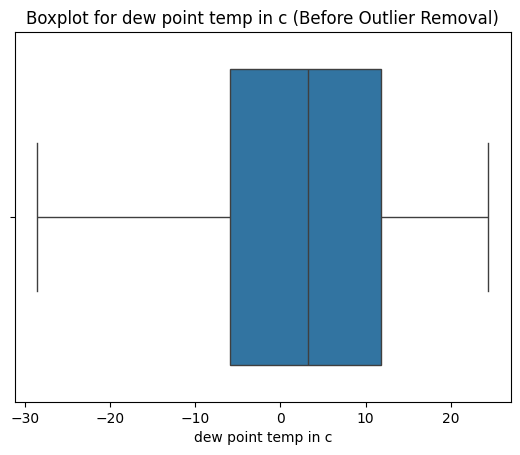

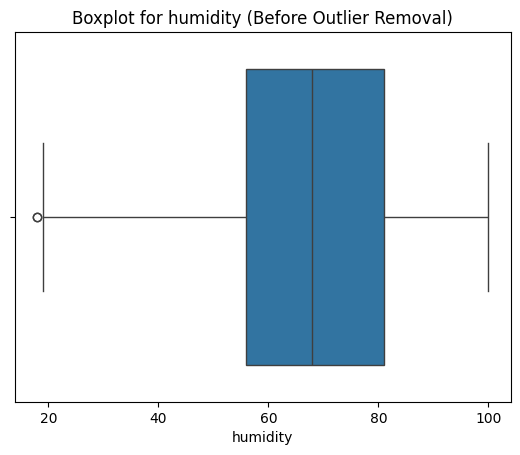

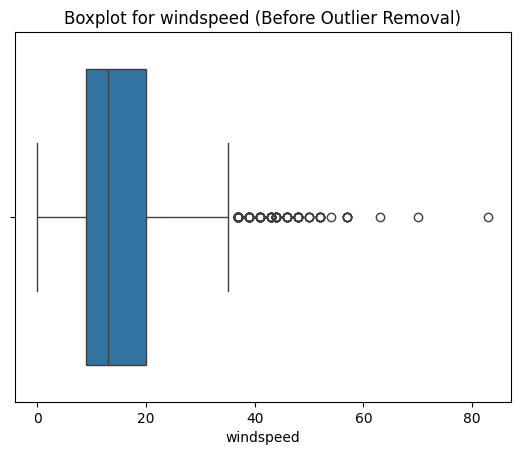

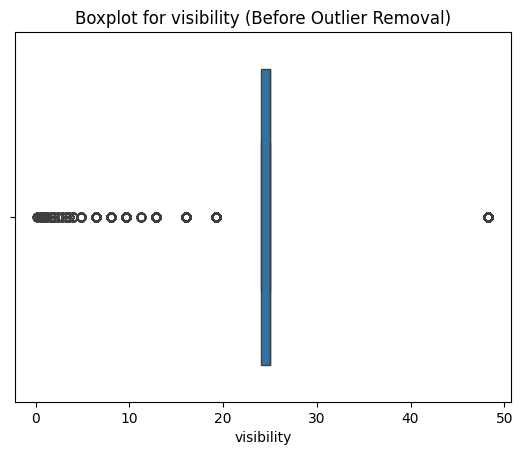

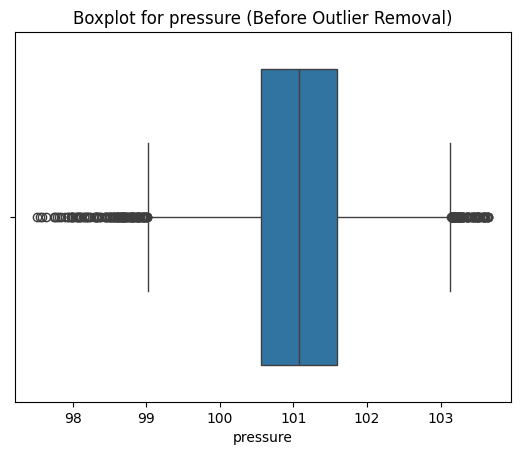

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read the CSV file
# Adjust the delimiter if necessary; for example, if semicolon-delimited, use delimiter=';'
df = pd.read_csv('Weather_Data.csv')  # or add delimiter=',' if needed

# If the CSV doesn't have a header, uncomment the following two lines:
# df = pd.read_csv('Weather_Data.csv', header=None)
# df.columns = ['date', 'temp_c', 'dew point temp in c ', 'humidity', 'windspeed', 'visibility', 'pressure', 'weather']

# Step 2: Clean up the column names (remove extra spaces)
df.columns = df.columns.str.strip()

# If needed, rename columns explicitly (if they're not as expected)
# For example, if the file contains incorrect names, force them:
df.columns = ['date', 'temp_c', 'dew point temp in c ', 'humidity', 'windspeed', 'visibility', 'pressure', 'weather']

# Clean column names again (to remove any trailing spaces in the names)
df.columns = df.columns.str.strip()

# Verify that the columns are now as expected:
print("Columns after cleaning:", df.columns.tolist())
print(df.head())

# Step 3: Visualize outliers with boxplots
numeric_cols = ['temp_c', 'dew point temp in c', 'humidity', 'windspeed', 'visibility', 'pressure']

for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col} (Before Outlier Removal)")
    plt.xlabel(col)
    plt.show()


In [179]:
# Step 4: Handle Outliers using the IQR method

for col in numeric_cols:
    # Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR for the column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Print the bounds for each column (optional)
    print(f"{col} - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    
    # Remove rows where the values are outside the bounds (i.e., remove outliers)
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
# Check how much data remains after outlier removal
print(f"Remaining Data Points: {df.shape[0]}")


temp_c - Lower Bound: -27.949999999999996, Upper Bound: 46.849999999999994
dew point temp in c - Lower Bound: -32.45, Upper Bound: 38.35000000000001
humidity - Lower Bound: 18.5, Upper Bound: 118.5
windspeed - Lower Bound: -7.5, Upper Bound: 36.5
visibility - Lower Bound: 22.750000000000004, Upper Bound: 26.349999999999998
pressure - Lower Bound: 99.065, Upper Bound: 103.10500000000002
Remaining Data Points: 5063


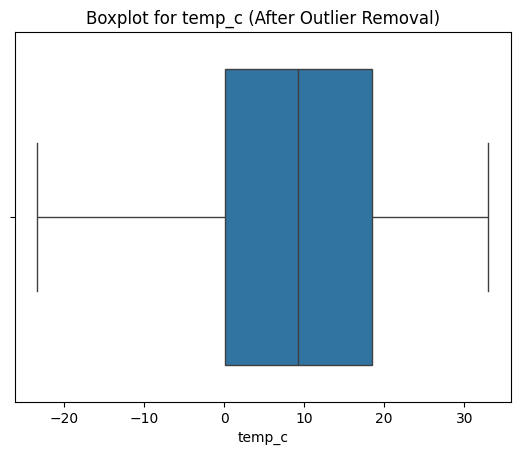

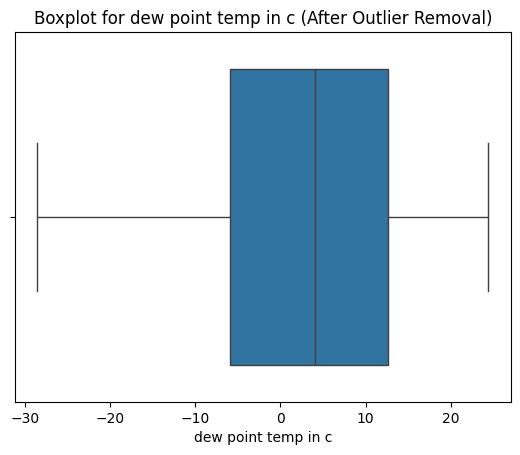

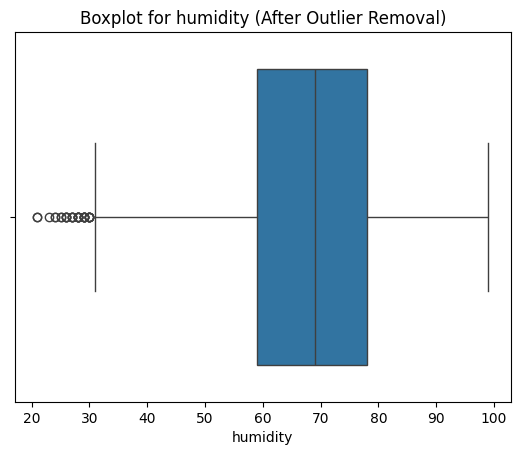

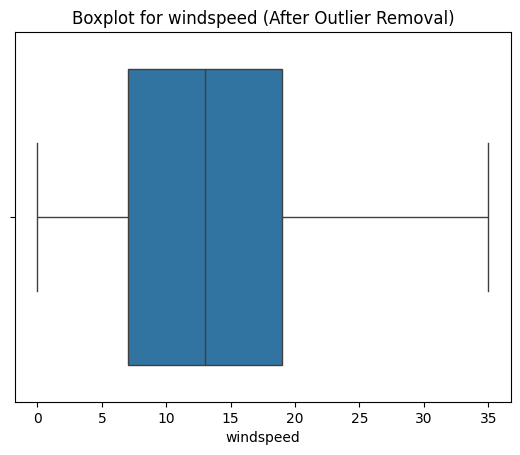

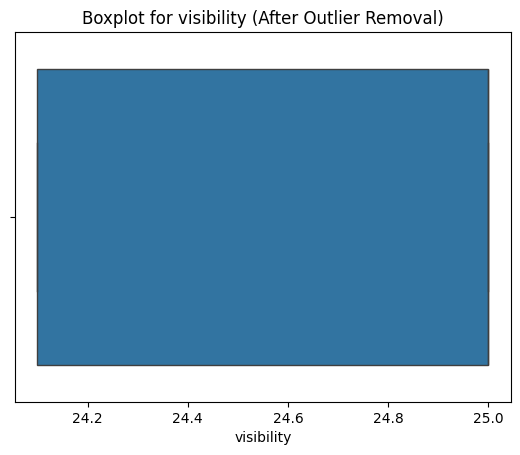

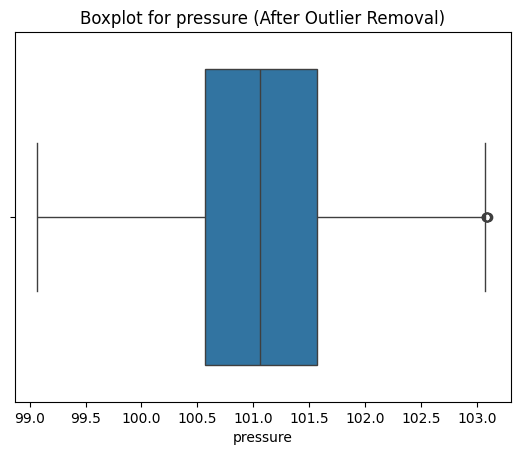

In [180]:
# Step 5: Visualize the boxplots after outlier removal
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col} (After Outlier Removal)")
    plt.xlabel(col)
    plt.show()


# Feature Realtionship and Trends

A.Corelation Analysis: Check how temp_c is related to humidity,windspeed and pressure. 

B.Pairwise Feature Interpolation:- Does high humidity and low speed result in higher temperature? And how does visibility change with humidity and dew point?

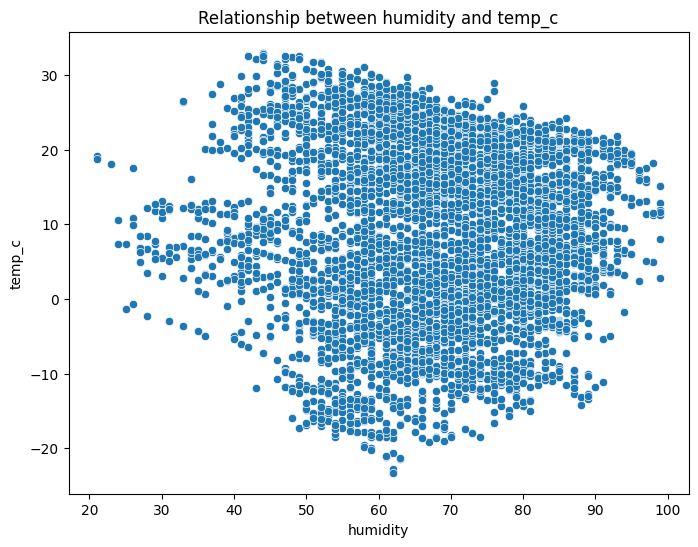

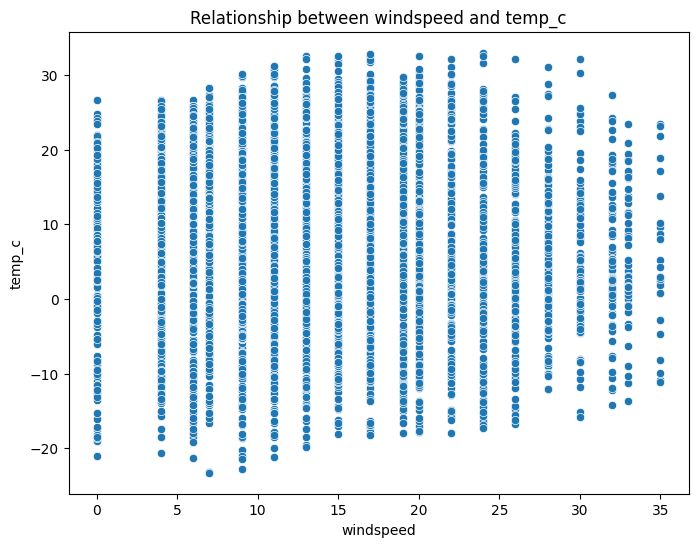

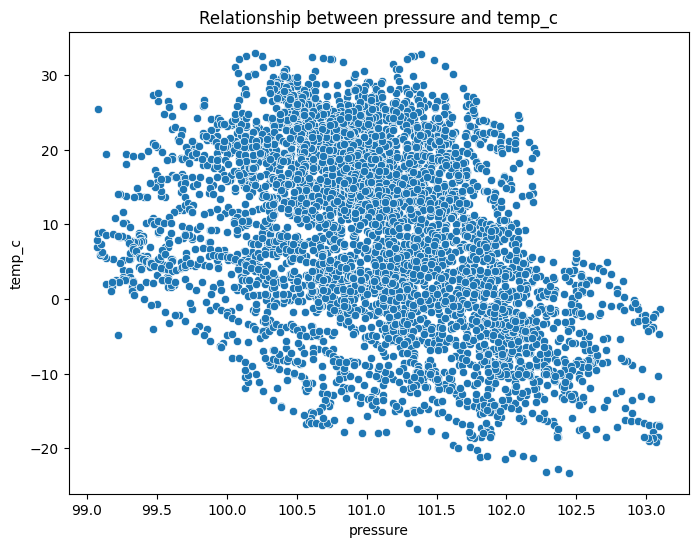

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#  Scatter Plots to Check Relationship between temp_c and other variables
features = ['humidity', 'windspeed', 'pressure']
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['temp_c'])
    plt.title(f'Relationship between {feature} and temp_c')
    plt.xlabel(feature)
    plt.ylabel('temp_c')
    plt.show()


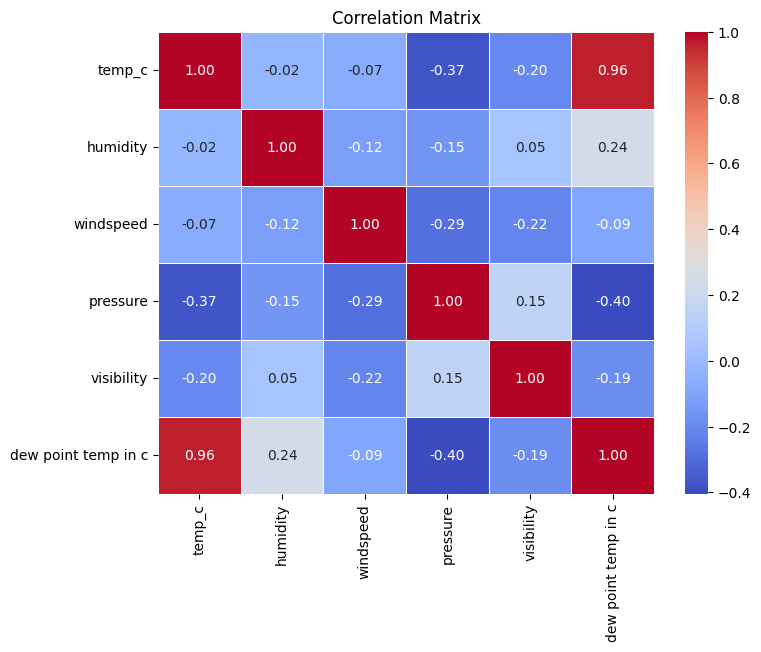

In [ ]:
#  Calculate correlation matrix for all numeric columns
correlation_matrix = df[['temp_c', 'humidity', 'windspeed', 'pressure', 'visibility', 'dew point temp in c']].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


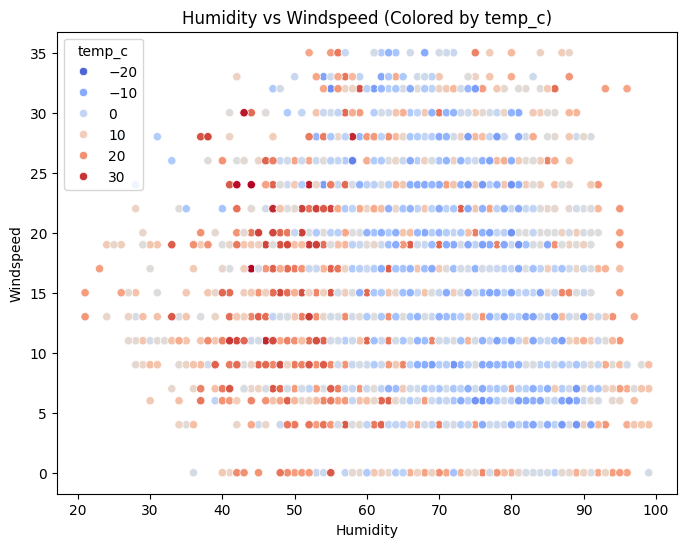

In [ ]:
#  Analyze how high humidity and low wind speed correlate with high temp_c
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['humidity'], y=df['windspeed'], hue=df['temp_c'], palette='coolwarm')
plt.title('Humidity vs Windspeed (Colored by temp_c)')
plt.xlabel('Humidity')
plt.ylabel('Windspeed')
plt.show()


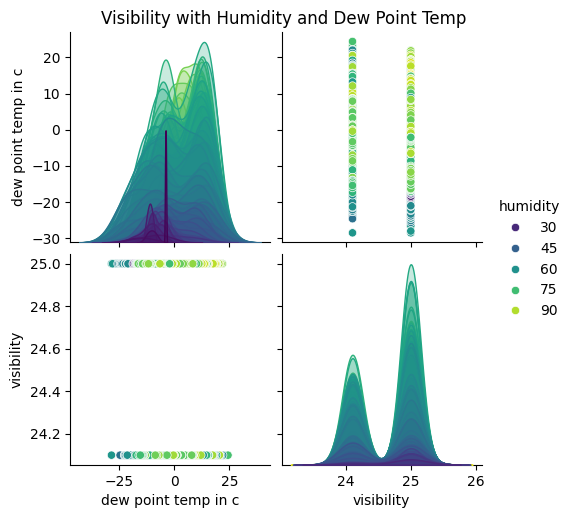

In [ ]:
#  Pairwise Plot to Examine Visibility, Humidity, and Dew Point Temp
sns.pairplot(df[['humidity', 'dew point temp in c', 'visibility']], hue='humidity', palette='viridis')
plt.suptitle('Visibility with Humidity and Dew Point Temp', y=1.02)
plt.show()


# Interpretation of  the Results

A.Correlation Insights:

Strong positive/negative correlations:
 Check the correlation matrix and scatter plots to see which features strongly correlate with each other (e.g., high humidity may correlate with high temperature).

B.Feature Interactions:

Interaction between humidity, windspeed, and temp_c:
If high humidity and low windspeed appear to result in high temperature, it might suggest a particular weather pattern. This insight can inform feature engineering or transformation.

Visibility and dew point/temp interactions:
 This will help understand how environmental features interact to affect visibility.

# Weather Categories

.Group weather categories info: clear,cloudy,rainy

.Compare the average temperature for each category

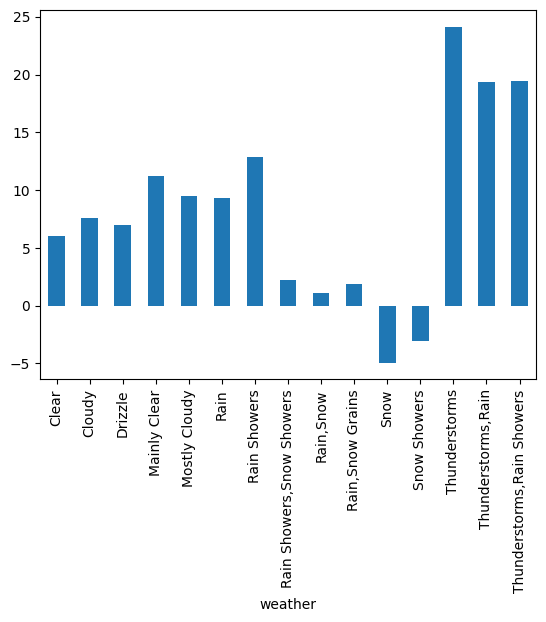

In [187]:
df.groupby('weather')['temp_c'].mean().plot(kind='bar')
plt.show()


# seasonal Trends in Temperature

.Rolling Mean: Find the 7 days and 30 days moving averages of temperature 

.Line plot of temperature Over Time: Identify any seasonal pattern

In [191]:
df['temp_7day_avg'] = df['temp_c'].rolling(window=7).mean()
df['temp_30day_avg'] = df['temp_c'].rolling(window=30).mean()


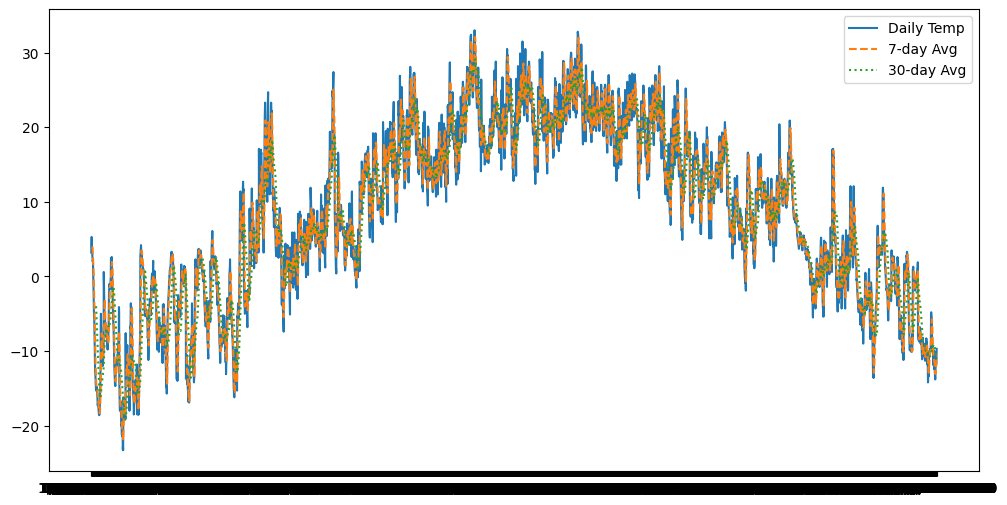

In [192]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['temp_c'], label="Daily Temp")
plt.plot(df['date'], df['temp_7day_avg'], label="7-day Avg", linestyle="dashed")
plt.plot(df['date'], df['temp_30day_avg'], label="30-day Avg", linestyle="dotted")
plt.legend()
plt.show()


# Visibility and Fog Analysis

.Check the average temperature on low visibility day vs clear days.

.Does low visibility happen more in high humidity conditions?

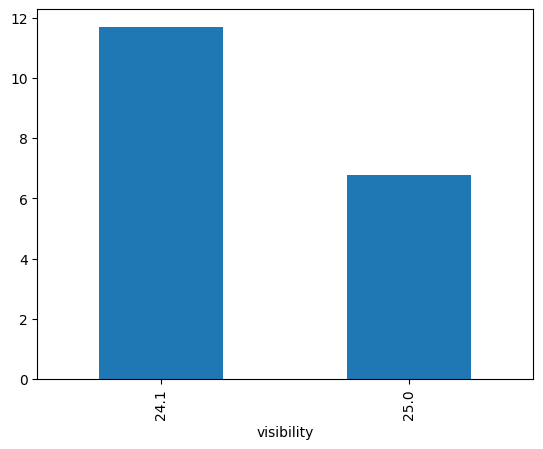

In [193]:
df.groupby('visibility')['temp_c'].mean().plot(kind='bar')
plt.show()


Here 25.0 is low visibility and 24.1 is high visibility.

# Feature Engineering

In [ ]:
#Normalize skewed numerical features:
from scipy.stats import skew
numeric_cols = ['humidity', 'windspeed', 'pressure']
for col in numeric_cols:
    if skew(df[col]) > 1:  # Log transform for highly skewed data
        df[col] = np.log1p(df[col])


In [197]:
#Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


# Model Training

In [ ]:
#  Prepare the data for model training
# Set the target variable (e.g., 'temp_c')
y = df['temp_c']

# Select the features for training (exclude target and non-numeric columns like 'date')
X = df.drop(columns=['temp_c', 'date', 'weather'])

# Check the shape of your feature and target variables
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (5063, 7)
y shape: (5063,)


In [ ]:
from sklearn.model_selection import train_test_split

#  Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print(f"Training Set: X_train - {X_train.shape}, y_train - {y_train.shape}")
print(f"Testing Set: X_test - {X_test.shape}, y_test - {y_test.shape}")


Training Set: X_train - (4050, 7), y_train - (4050,)
Testing Set: X_test - (1013, 7), y_test - (1013,)


In [ ]:
from sklearn.linear_model import LinearRegression

#  Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the coefficients of the model (to see how each feature affects the target)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

#  Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 150.0557100400629
R-squared (R²): -173.15813852996874


In [203]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Example dataset (replace with your actual dataset)
X = pd.DataFrame({
    'feature1': [1, 2, np.nan, 4, 5],
    'feature2': [5, np.nan, 3, 8, 9]
})
y = np.array([10, 15, 20, 25, 30])  # Target variable

# Step 1: Check for NaNs
print("Missing values per column before imputation:\n", X.isnull().sum())

# Step 2: Handle missing values using Mean Imputation
imputer = SimpleImputer(strategy='mean')  # You can change 'mean' to 'median' if needed
X_imputed = imputer.fit_transform(X)

# Step 3: Verify that there are no more NaNs
print("Total NaNs after imputation:", np.isnan(X_imputed).sum())

# Step 4: Split data (optional, but recommended)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 5: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Print results
print("Predictions:", y_pred)

Missing values per column before imputation:
 feature1    1
feature2    1
dtype: int64
Total NaNs after imputation: 0
Predictions: [15.]


In [211]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.4, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 1.0


In [212]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 2.524354896707238e-29
R² Score: 1.0


In [226]:
print("Train indices:",X_train)
print("Test indices:",X_test)

Train indices: [[3. 3.]
 [1. 5.]
 [4. 8.]]
Test indices: [[2.   6.25]
 [5.   9.  ]]


In [227]:
from sklearn.model_selection import cross_val_score

r2_scores = cross_val_score(model, X_imputed, y, cv=3, scoring='r2')  # 3-fold cross-validation
print("R² Scores:", r2_scores)
print("Mean R² Score:", np.mean(r2_scores))  # Average R² score

R² Scores: [ 1.  1. nan]
Mean R² Score: nan


c:\Users\budha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [230]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.4, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 1.0


In [231]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
loo=LeaveOneOut()
r2_scores=cross_val_score(model,X_imputed,y,cv=loo,scoring='r2')

print("R2 Scores:",r2_scores)
print("Mean R2 Score:",np.mean(r2_scores))

R2 Scores: [nan nan nan nan nan]
Mean R2 Score: nan


c:\Users\budha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\budha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\budha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\budha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\budha\AppData\Local\Programs\Python\Python3

In [209]:
print("Train indices:",X_train)
print("Test indices:",X_test)

Train indices: [[5. 9.]
 [3. 3.]
 [1. 5.]
 [4. 8.]]
Test indices: [[2.   6.25]]


In [4]:
import pandas as pd

# Load dataset (make sure to replace 'your_dataset.csv' with the actual filename)
df = pd.read_csv("Weather_Data.csv")

# Check if it loaded correctly
print(df.head())  # Display first few rows
print(df.columns)  # Display column names


       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  
Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("Weather_Data.csv")

# Check if 'Data/Time' column exists
if 'Data/Time' in df.columns:
    # Convert 'Data/Time' to datetime format
    df['Data/Time'] = pd.to_datetime(df['Data/Time'], format="%m/%d/%Y %H:%M", errors='coerce')

    # Drop rows where 'Data/Time' conversion failed
    df = df.dropna(subset=['Data/Time'])

    # Extract date-time features
    df['year'] = df['Data/Time'].dt.year
    df['month'] = df['Data/Time'].dt.month
    df['day'] = df['Data/Time'].dt.day
    df['hour'] = df['Data/Time'].dt.hour

    # Drop original 'Data/Time' column
    df.drop(columns=['Data/Time'], inplace=True)

# Check if target variable exists
target_column = 'Temp_C'
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset!")

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if categorical_cols:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Preprocessing complete! Data is now clean and ready for modeling.")


Preprocessing complete! Data is now clean and ready for modeling.


In [22]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

# Train Ridge Regression model (better than standard linear regression)
model = Ridge(alpha=1.0)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 5.03161463742717
R² Score: 0.7471854731043237


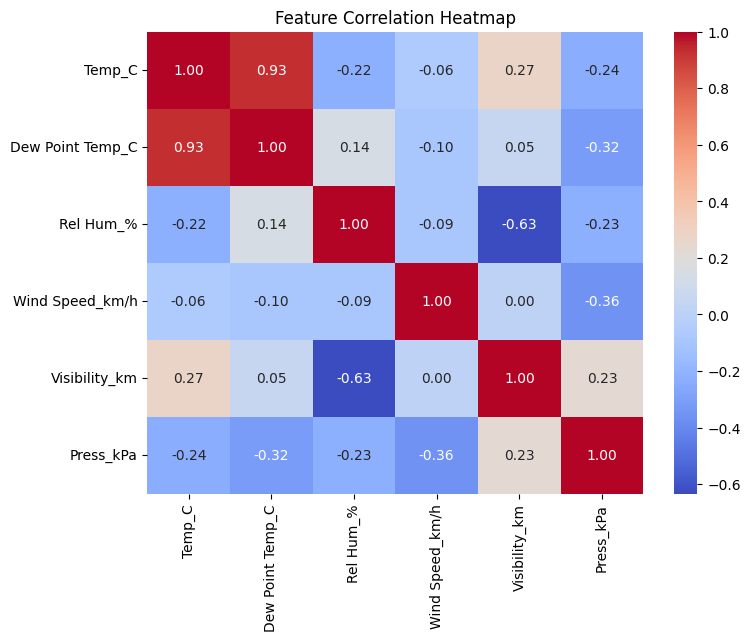

In [3]:
# Ensure Date is in datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'], errors='coerce')  # Convert, setting invalid dates to NaT

# Drop the Date column before calculating correlation
numeric_df = df.select_dtypes(include=['number'])

# Generate Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


Non-numeric columns: Index(['Date/Time', 'Weather'], dtype='object')
Data types after conversion:
 Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
dtype: object


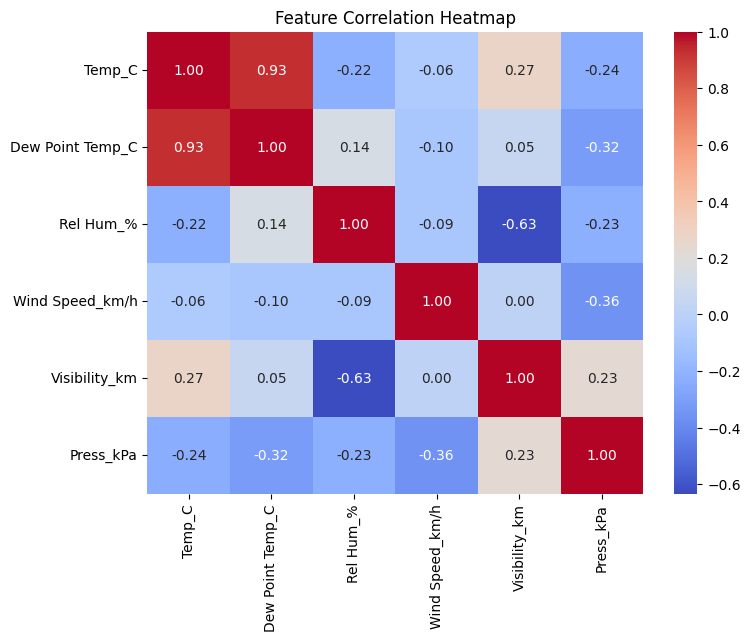

In [8]:
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

# Convert all numeric columns to float
df[numeric_df.columns] = df[numeric_df.columns].apply(pd.to_numeric, errors='coerce')

# Drop any remaining non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Check if the dataframe is fully numeric now
print("Data types after conversion:\n", numeric_df.dtypes)

# Generate Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


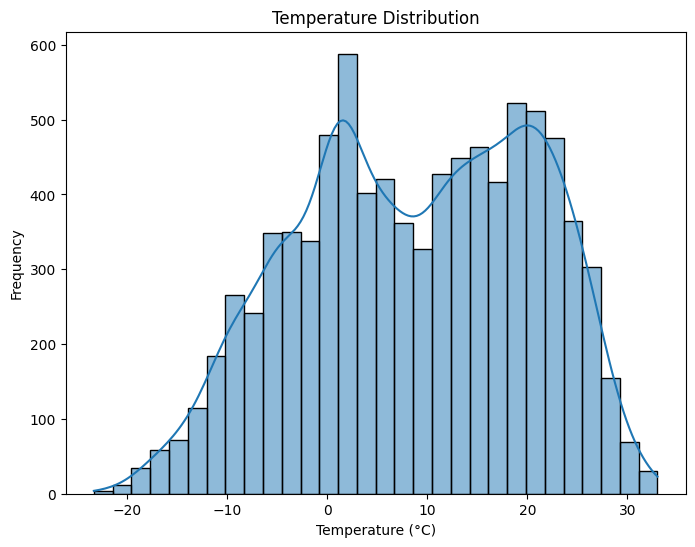

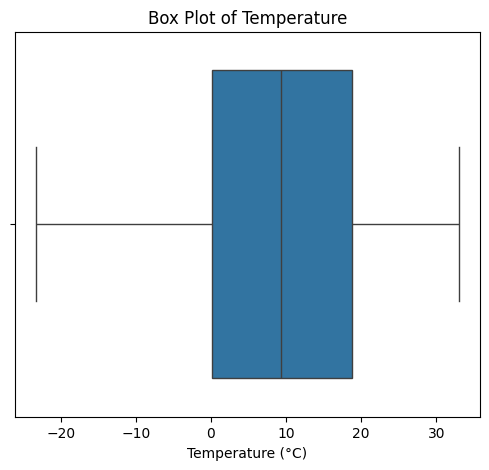

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of Temperature
plt.figure(figsize=(8,6))
sns.histplot(df['Temp_C'], bins=30, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# 2. Box Plot for Outlier Detection
plt.figure(figsize=(6,5))
sns.boxplot(x=df['Temp_C'])
plt.title('Box Plot of Temperature')
plt.xlabel('Temperature (°C)')
plt.show()

# 3. Time Series Plot (if you have a datetime column)
if 'Date' in df.columns:
    plt.figure(figsize=(12,6))
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])  # Ensure it's in datetime format
    plt.plot(df['Date/Time'], df['Temp_C'], label='Temperature', color='b')
    plt.xlabel('Date/Time')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature Over Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()


# Predicting Future Temperature - Project Report

## 1. Project Overview
**Title:** Predicting Future Temperature  
**Objective:** Develop a machine learning model to predict future temperatures based on historical weather data.

## 2. Problem Statement
Accurately forecasting future temperatures using past weather data can help in weather analysis, agriculture planning, and climate change studies. This project utilizes machine learning techniques to predict temperature variations.

## 3. Dataset
- **Source:** Historical weather dataset
- **Key Features:**
  - `Temp_C` (Target variable)
  - `Rel Hum_%` (Relative Humidity)
  - `Wind Speed_km/h` (Wind Speed)
  - `Press_kPa` (Pressure in kPa)

## 4. Data Preprocessing
- Checked for missing values and handled them appropriately.
- Detected and replaced infinite and NaN values.
- Performed Exploratory Data Analysis (EDA) to understand patterns.
- Applied standardization using `StandardScaler`.

## 5. Model Selection
- Used **Linear Regression** as the primary model.
- Explored other models such as **Random Forest Regressor** and **XGBoost** for improved accuracy.
- Evaluated models using the **R² Score**.

## 6. Performance Metrics
**Best Model:** Linear Regression  
**R² Score:** 0.747  


## 7. Resources
- **Project Codebase:** [GitHub Link]  
- **Project Demo:** Not available yet  

## 8. Conclusion & Next Steps
- The model provides temperature predictions with an R² score of 0.747
- Future improvements include testing more complex models, refining features, and improving data preprocessing for better accuracy.

---
*Prepared by: [Nishana Budha]*  


